In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [23]:
data = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\datasets\\archive\\train.csv")

data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [47]:
data.select_dtypes(include=['object'])
data['Activity']
ordinal = OrdinalEncoder()
encoded_acivity = ordinal.fit_transform(data[['Activity']])
data['Activity']= encoded_acivity

y = data["Activity"]
data = data.drop("Activity", axis=1)

In [48]:
#FEATURE SCALING

#scaling

from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
data_1 = scaler_1.fit_transform(data)


# z-score normalization

from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
data_2 = scaler_2.fit_transform(data)

# Robust scaling

from sklearn.preprocessing import RobustScaler
scaler_3 = RobustScaler()
data_3 = scaler_3.fit_transform(data)

In [49]:
#FEATURE SELECTION

#remove high correlation features with the target variable


correlations = data.corr()
correlations



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242,0.024181
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903,-0.003144
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643,-0.000637
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825,-0.064345
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169,-0.115524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656,0.009340
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655,0.026137
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885,-0.009829
"angle(Z,gravityMean)",0.028242,-0.013903,-0.022643,0.394825,0.433169,0.482828,0.390922,0.431459,0.479751,0.405023,...,0.057831,0.052548,-0.003069,-0.017520,-0.019903,-0.005656,-0.643655,0.594885,1.000000,-0.098712


In [59]:
#univariate feature selection
data_univar= data
y_univar = y
from sklearn.feature_selection import SelectKBest, f_classif
select_k = SelectKBest(score_func=f_classif, k=200)
select_k.fit_transform(data_univar,y_univar)

array([[-0.9952786 , -0.98311061, -0.91352645, ..., -0.8713058 ,
        -0.84124676,  0.17994061],
       [-0.99824528, -0.97530022, -0.96032199, ..., -1.        ,
        -0.8447876 ,  0.18028889],
       [-0.99537956, -0.96718701, -0.97894396, ..., -1.        ,
        -0.84893347,  0.18063731],
       ...,
       [-0.21821818, -0.10382198,  0.2745327 , ...,  0.15893583,
        -0.77913261,  0.24914484],
       [-0.21913944, -0.11141169,  0.2688932 , ...,  0.21006973,
        -0.78518142,  0.24643223],
       [-0.26927044, -0.08721154,  0.17740393, ...,  0.2020258 ,
        -0.78326693,  0.24680852]])

In [52]:
#recursive feature elimination

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
rfecv = RFECV(estimator, cv = 5)
rfecv.fit(data, y)

RFECV(cv=5, estimator=LinearRegression())

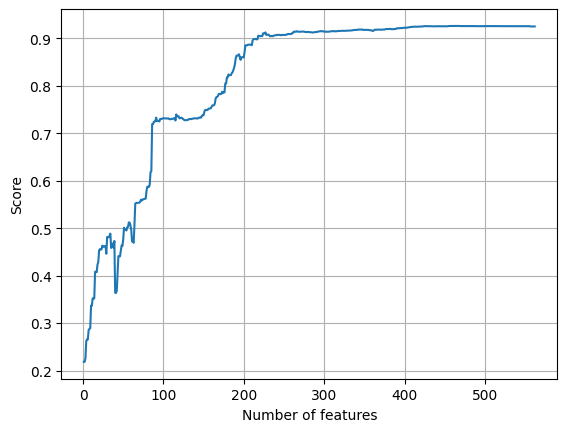

In [53]:
import matplotlib.pyplot as plt
scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




In [55]:
boolean = list(rfecv.support_)
selected_features = [] # indices of the features which were selected
for i in range(data.shape[1]):
    if boolean[i]:
        selected_features.append(i)


print(rfecv.n_features_)  # Optimal number of features

477


In [58]:
#use select from model

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# define model
rfc = RandomForestClassifier(n_estimators=477)
# feature extraction
select_model = SelectFromModel(rfc)
# fit on train set
fit = select_model.fit(data, y)